# Clustering

# 2. K-means vs Gaussian Mixture

In this lab, you will compare K-means and the Gaussian Mixture Model (GMM) on the [Iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher). Feel free to use any dataset of your choice.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

## Data

In [4]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = iris.target_names

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(label_names)

['setosa' 'versicolor' 'virginica']


In [7]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    plt.figure(figsize=(5,5))
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.show()

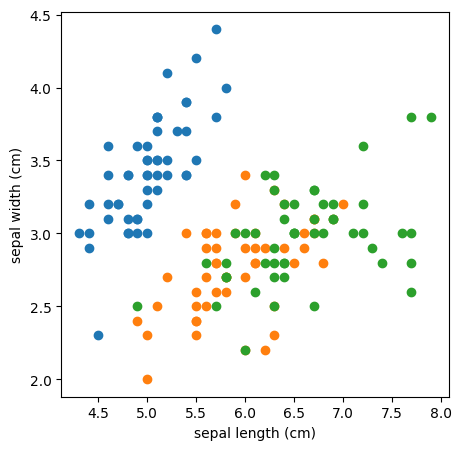

In [8]:
show_data(X, y, [0, 1])

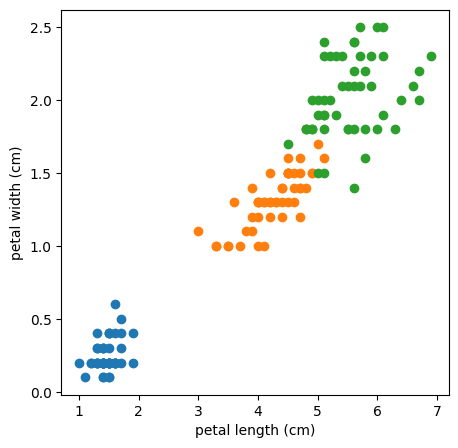

In [9]:
show_data(X, y, [2, 3])

## K-means

We first apply k-means and display the clusters.

In [10]:
n_clusters = 3
km = KMeans(n_clusters, n_init=10)
labels = km.fit_predict(X)

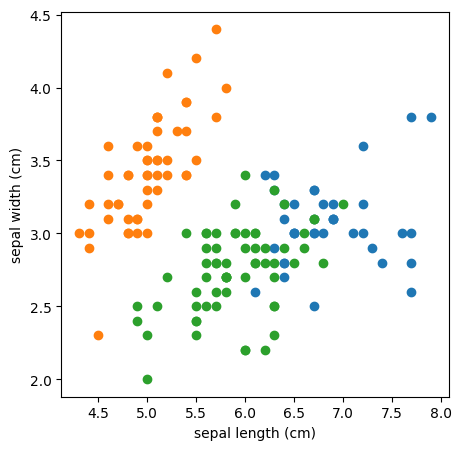

In [11]:
show_data(X, labels, [0, 1])

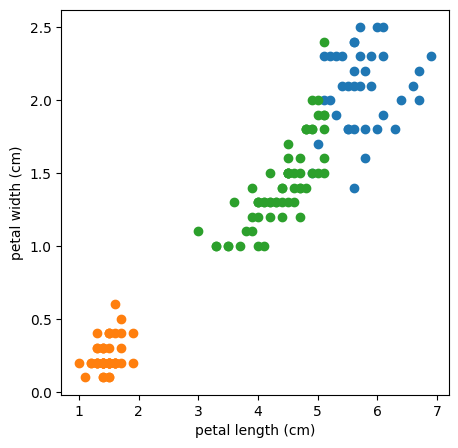

In [12]:
show_data(X, labels, [2, 3])

## Gaussian Mixture Model

We now compare with the Gaussian Mixture Model.

In [13]:
gm = GaussianMixture(n_clusters)
labels_ = gm.fit_predict(X)

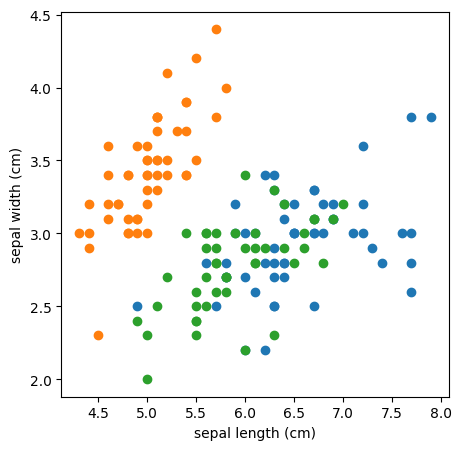

In [14]:
show_data(X, labels_, [0, 1])

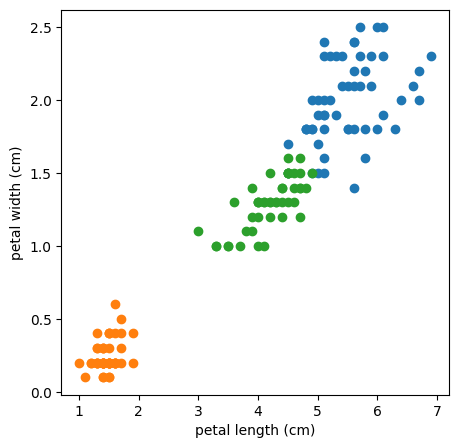

In [15]:
show_data(X, labels_, [2, 3])

## To do

* Display the contigency matrix for each clustering. Which one looks better?
* Confirm your guess using the ARI and AMI scores.
* Check that the optimal number of clusters is 3.
* Is it possible to guess the optimal number of clusters with the silhouette scores?<br>
Interpret the results.

### Contigency Matrix

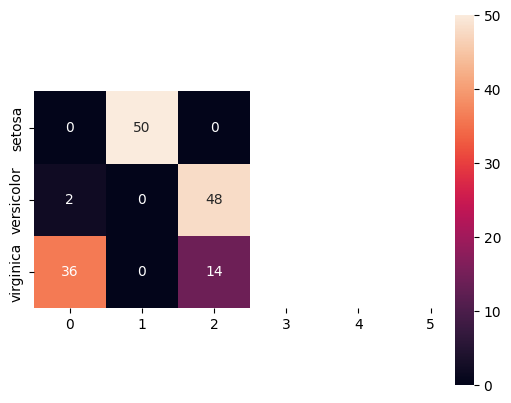

In [22]:
contingency_kmeans = contingency_matrix(y, labels)
sns.heatmap(contingency_kmeans, annot=True, square=True, xticklabels=np.arange(n_clusters), yticklabels=label_names);

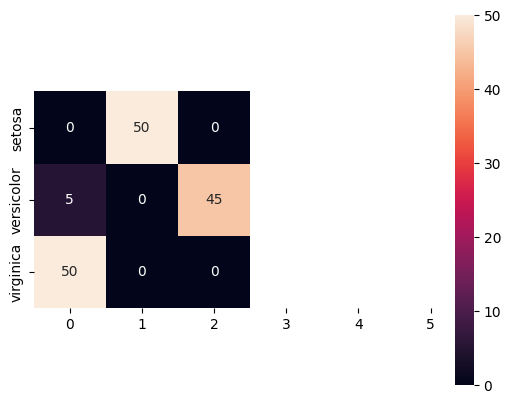

In [23]:
contingency_gmm = contingency_matrix(y, labels_)
sns.heatmap(contingency_gmm, annot=True, square=True, xticklabels=np.arange(n_clusters), yticklabels=label_names);

### ARI and AMI scores

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/

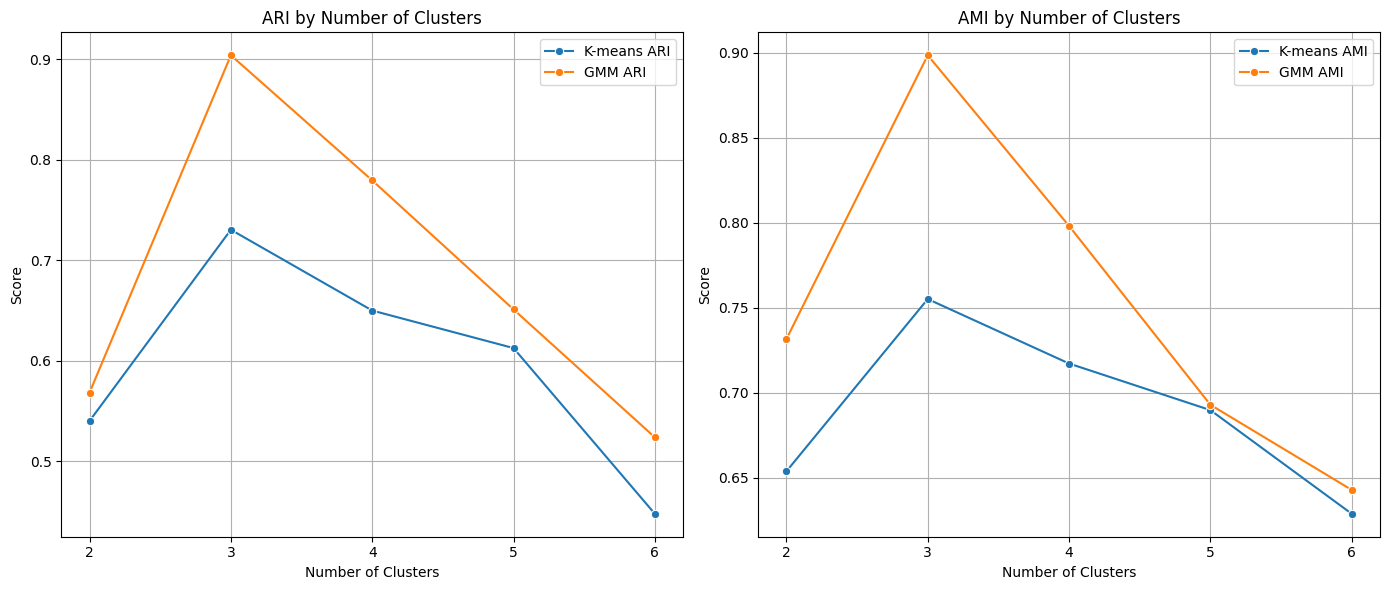

In [21]:
ari_scores_kmeans = []
ari_scores_gmm = []
ami_scores_kmeans = []
ami_scores_gmm = []

for n_clusters in cluster_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels_kmeans = kmeans.fit_predict(X)
    
    # GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels_gmm = gmm.fit_predict(X)
    
    # ARI and AMI scores for K-means
    ari_kmeans = adjusted_rand_score(y, labels_kmeans)
    ami_kmeans = adjusted_mutual_info_score(y, labels_kmeans, average_method='arithmetic')
    ari_scores_kmeans.append(ari_kmeans)
    ami_scores_kmeans.append(ami_kmeans)
    
    # ARI and AMI scores for GMM
    ari_gmm = adjusted_rand_score(y, labels_gmm)
    ami_gmm = adjusted_mutual_info_score(y, labels_gmm, average_method='arithmetic')
    ari_scores_gmm.append(ari_gmm)
    ami_scores_gmm.append(ami_gmm)

# Plotting ARI scores
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=cluster_range, y=ari_scores_kmeans, marker='o', label='K-means ARI')
sns.lineplot(x=cluster_range, y=ari_scores_gmm, marker='o', label='GMM ARI')
plt.title('ARI by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Plotting AMI scores
plt.subplot(1, 2, 2)
sns.lineplot(x=cluster_range, y=ami_scores_kmeans, marker='o', label='K-means AMI')
sns.lineplot(x=cluster_range, y=ami_scores_gmm, marker='o', label='GMM AMI')
plt.title('AMI by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:


# Checking silhouette scores for K-means and GMM
silhouette_kmeans = silhouette_score(X, labels)
silhouette_gmm = silhouette_score(X, labels_)

(contingency_kmeans, contingency_gmm, 
 (ari_kmeans, ami_kmeans, silhouette_kmeans), 
 (ari_gmm, ami_gmm, silhouette_gmm))


(array([[ 0, 50,  0],
        [ 2,  0, 48],
        [36,  0, 14]]),
 array([[ 0, 50,  0],
        [ 5,  0, 45],
        [50,  0,  0]]),
 (0.44753353143336, 0.628873924403467, 0.5528190123564095),
 (0.5236336576358074, 0.6429090321784691, 0.5011761635067206))

## Variants

Some constraints can be added on the covariance matrices so as to make the model simpler and less prone to overfitting.

In [ ]:
gm = GaussianMixture(n_clusters, covariance_type='spherical')

## To do 

* Test the various types of covariance matrices and interpret the results.
* Redo the experiments with a scaling factor of 10 on ones of the 4 components and interpret the results.

In [25]:
# Define a function to test GMM with different covariance types and compute silhouette scores
def test_gmm_covariance_types(X, covariance_types):
    results = []
    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
        labels = gmm.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        results.append((cov_type, silhouette_avg))
    return results

# Types of covariance matrices to test
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Testing GMM with different covariance types on the original Iris dataset
results_covariance_types = test_gmm_covariance_types(X, covariance_types)

# Displaying the results
results_covariance_types


[('full', 0.5011761635067206),
 ('tied', 0.49044386852357696),
 ('diag', 0.5522806746748185),
 ('spherical', 0.5528190123564095)]

In [26]:
# Applying a scaling factor of 10 to one of the components (e.g., the first feature)
X_scaled = X.copy()
X_scaled[:, 0] *= 10

# Testing GMM with different covariance types on the scaled Iris dataset
results_covariance_types_scaled = test_gmm_covariance_types(X_scaled, covariance_types)

# Displaying the results for the scaled dataset
results_covariance_types_scaled


[('full', 0.3221131463408424),
 ('tied', 0.36284738339334455),
 ('diag', 0.3306162098959699),
 ('spherical', 0.510576822926378)]

In [ ]:
X_scale = X.copy()
X_scale[:, 0] *= 10